# Watershed
Very first try at watershed mecanism

Source of inspiration: https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

In [21]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Load image

In [22]:
image_name = "./dataset/png/Candida.albicans_0004.png"
image = cv.imread(image_name)

Binarize image

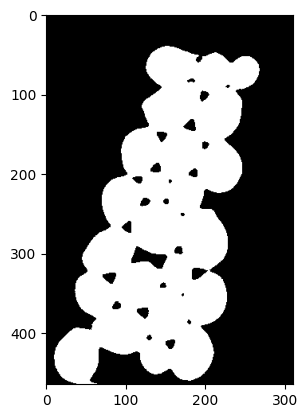

In [23]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, binarized_image = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
plt.imshow(binarized_image, cmap='gray', vmin=0, vmax=255)

# Find markers

* BG/FG

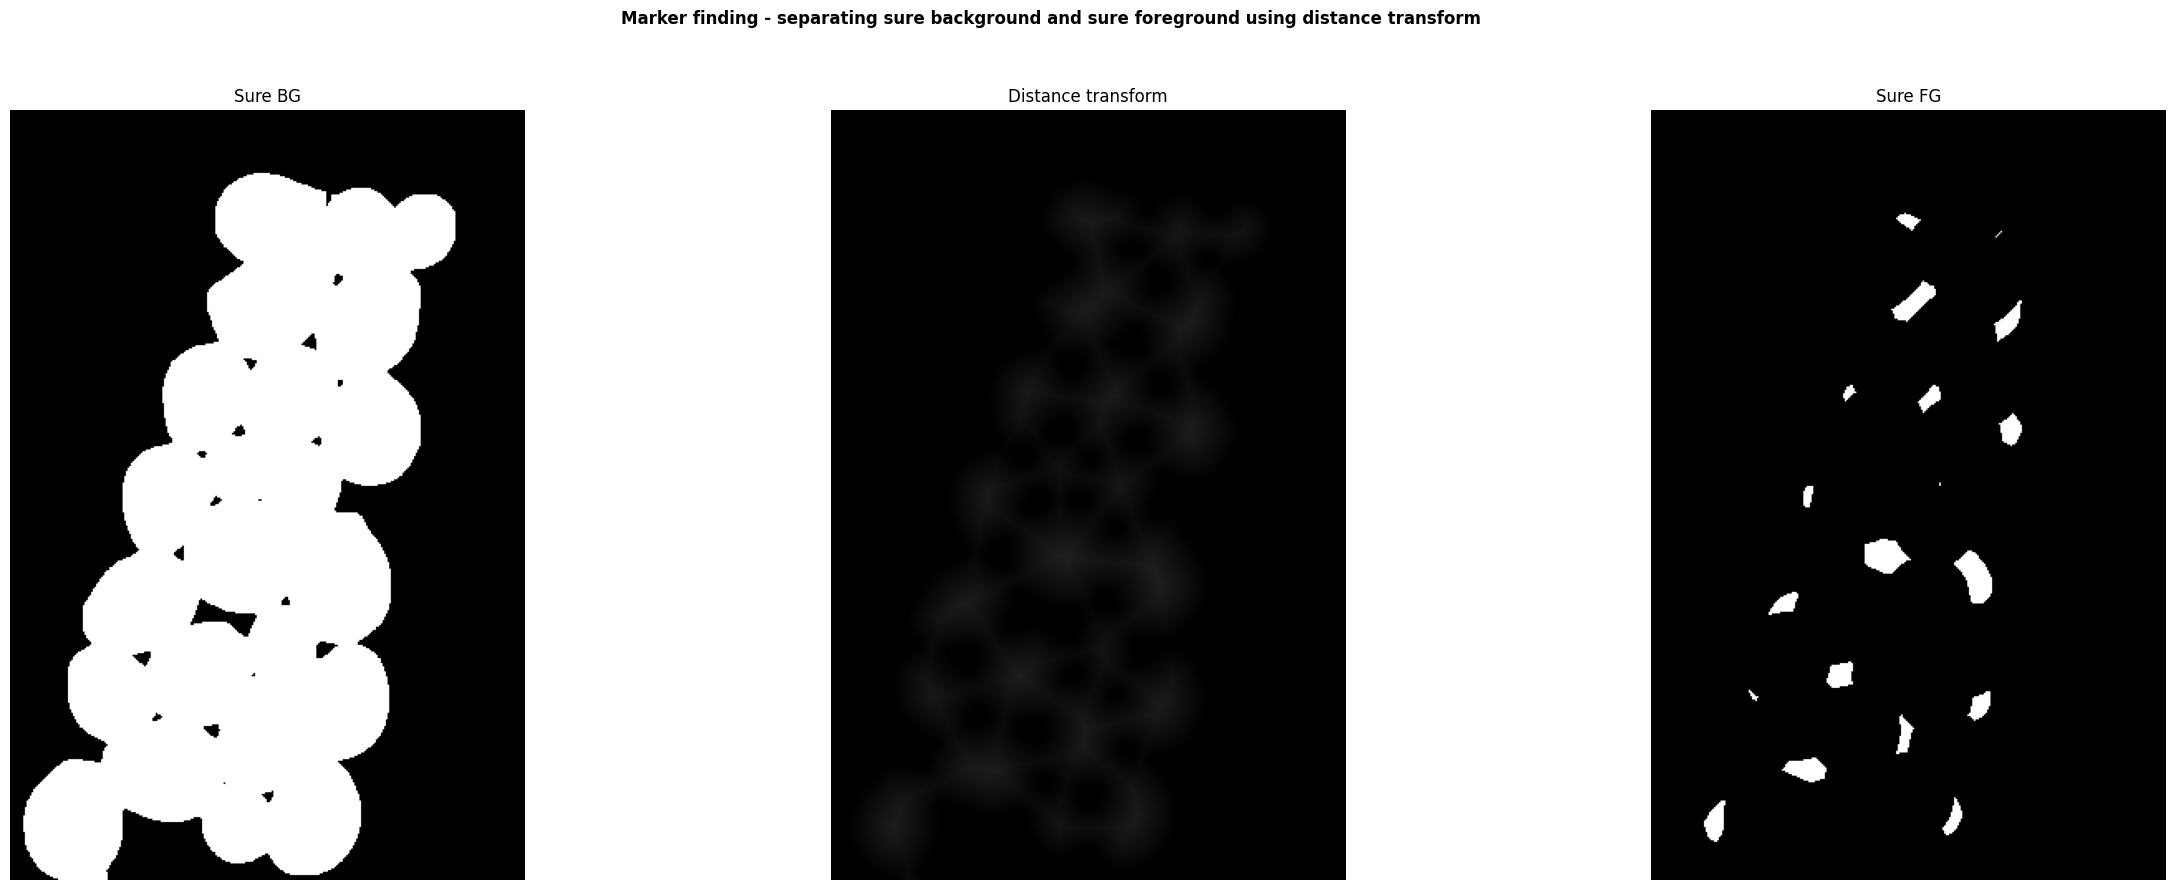

In [29]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(binarized_image, cv.MORPH_OPEN, kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening, kernel, iterations=2)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

#Display all kmeansed iamges
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle(f'Marker finding - separating sure background and sure foreground using distance transform', fontweight='bold')

ax[0].imshow(sure_bg, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Sure BG')
ax[0].set_axis_off()

ax[1].imshow(dist_transform, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Distance transform')
ax[1].set_axis_off()

ax[2].imshow(sure_fg, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Sure FG')
ax[2].set_axis_off()